In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
metrics_new = pd.read_csv(r"C:\unit_density_comparison\metrics_new.csv")
metrics = pd.read_csv(r"C:\unit_density_comparison\metrics.csv")

In [3]:
def get_unit_density(metrics: pd.DataFrame) -> list:
    frequency_counts = metrics['peak_channel'].value_counts().sort_index().reset_index().to_numpy()
    channelsRecorded = frequency_counts[:, 0].tolist()
    channelsOriginal = []

    if np.max(frequency_counts) > 384:
        max_range = 768
    else:
        max_range = 384

    for i in range(max_range):
        if i in channelsRecorded:
            ind = channelsRecorded.index(i)
            channelsOriginal.append([i, frequency_counts[ind, 1]])
        else:
            channelsOriginal.append([i, 0])
    return channelsOriginal

    """
    print('Max range', max_range)
    channelsOriginal = [[channelsOriginal[i][1], max_range - i - 1 + 256] for i in range(len(channelsOriginal))]

    x_val = [p[0] * 10 for p in channelsOriginal]
    conv = np.ones(10)

    smoothed = np.convolve(x_val, conv, mode='same')
    smoothed = smoothed / np.sum(conv)
    channelsOriginal = [[smoothed[i] - 100, channelsOriginal[i][1]] for i in range(len(channelsOriginal))]
    """

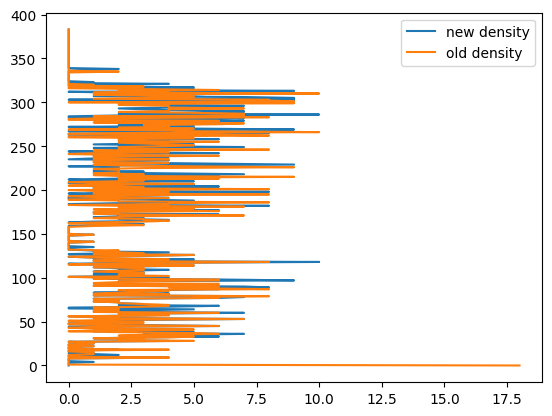

In [39]:
unit_density_new = get_unit_density(metrics_new)
unit_density_old = get_unit_density(metrics)
plt.plot([channel[1] for channel in unit_density_new], [channel[0] for channel in unit_density_new])
plt.plot([channel[1] for channel in unit_density_old], [channel[0] for channel in unit_density_old])
plt.legend(['new density', 'old density'])

In [39]:
probe = 'probeF'

In [37]:
metrics_new = pd.read_csv(rf"C:\unit_density_comparison\{probe}_metrics_new.csv")
metrics = pd.read_csv(rf"C:\unit_density_comparison\{probe}_metrics_old.csv")

In [38]:
peak_channel_defualt = metrics['peak_channel'].to_numpy()
peak_channel_car_before = metrics_new['peak_channel'].to_numpy()
np.save(f'//allen/scratch/aibstemp/arjun.sridhar/unit_density_comparison/674562_20231004/{probe}_default.npy', peak_channel_defualt)
np.save(f'//allen/scratch/aibstemp/arjun.sridhar/unit_density_comparison/674562_20231004/{probe}_car_before.npy', peak_channel_car_before)

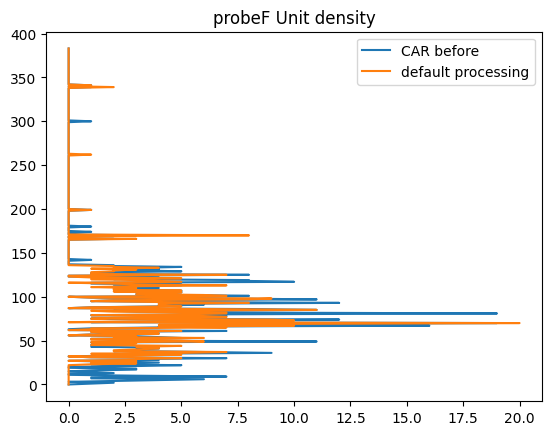

In [26]:
unit_density_new = get_unit_density(metrics_new)
unit_density_old = get_unit_density(metrics)

plt.plot([channel[1] for channel in unit_density_new], [channel[0] for channel in unit_density_new])
plt.plot([channel[1] for channel in unit_density_old], [channel[0] for channel in unit_density_old])
plt.legend(['CAR before', 'default processing'])
plt.title(f'{probe} Unit density')
plt.savefig(f'//allen/scratch/aibstemp/arjun.sridhar/unit_density_comparison/674562_20231004/{probe}.png')